In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [2]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [3]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']


In [4]:

names = ["20241014_activation_Pt2", "20241015_activation_KO6", "20241021_activation_LtpM"]

conditions = ["Pt2", "KO6", "LtpM"]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    df = pd.read_csv(path, index_col= False, sep=";")
    for col in columns_to_convert:
        df[col] = df[col].apply(fix_number_format)
        df[col] = df[col].apply(convert_to_list)
    results.append(df)

fig_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20241021_activation_LtpM/compare"
    
times_Fmax = [20, 80, 140, 200]

offset_Ek = 3.13
amp_EK = 1.5



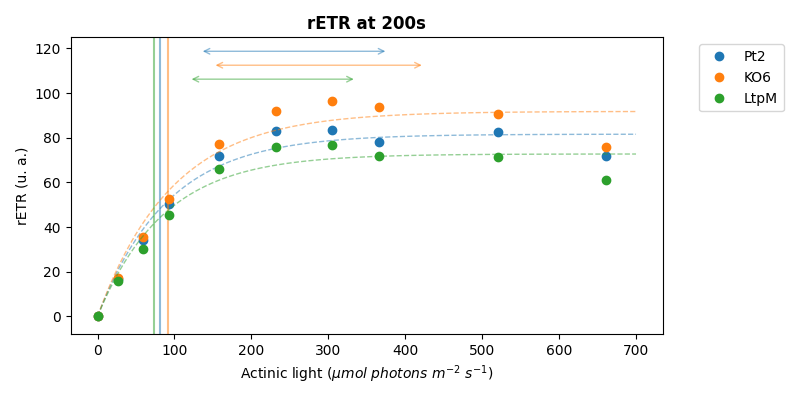

In [5]:

time = 200

Ek = []

fig, ax = plt.subplots(figsize = (8, 4))
conditions_to_compare = ["Pt2", "KO6", "LtpM"]
ax.set_ylim(-8, 125)
for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.Ek_fit(light, ETR, 0, 700, 100, p0 = [100, 100])
    Ek.append(popt[0])
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)    
    ylim = ax.get_ylim()
    ax.annotate('', xy=(offset_Ek*Ek[-1] - amp_EK*Ek[-1], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[-1] + amp_EK*Ek[-1], ylim[1]- 0.05*ylim[1]*(i+1)),
            arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))
    ax.axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 125)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()




fig.savefig(f"{fig_folder}/ETR_{time}s.png", dpi=300)

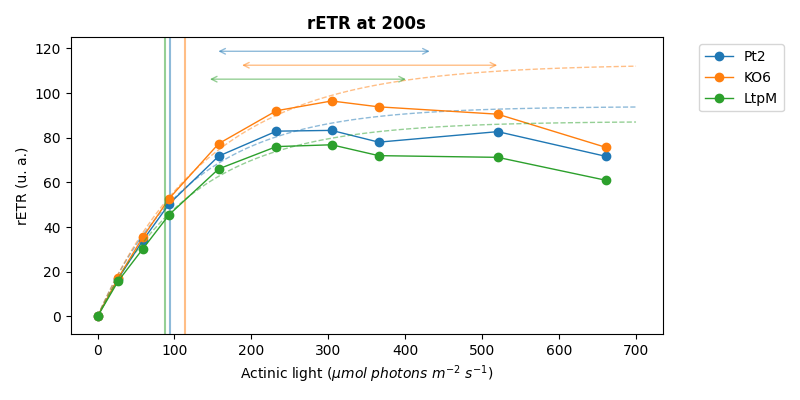

In [6]:

time = 200

Ek = []

fig, ax = plt.subplots(figsize = (8, 4))
conditions_to_compare = ["Pt2", "KO6", "LtpM"]
ax.set_ylim(-8, 125)
for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, linewidth = 1, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.Ek_fit(light[0:7], ETR[0:7], 0, 700, 100, p0 = [100, 100])
    Ek.append(popt[0])
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)    
    ylim = ax.get_ylim()
    ax.annotate('', xy=(offset_Ek*Ek[-1] - amp_EK*Ek[-1], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[-1] + amp_EK*Ek[-1], ylim[1]- 0.05*ylim[1]*(i+1)),
            arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))
    ax.axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 125)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()




fig.savefig(f"{fig_folder}/ETR_{time}s.png", dpi=300)

In [7]:
np.array(Ek) *2.5

array([235.14376984, 282.5332186 , 218.40870491])

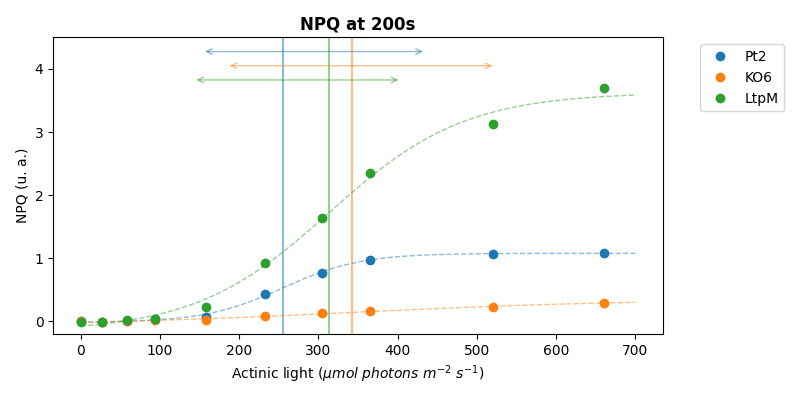

In [8]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(-0.2, 4.5)

for condition in conditions:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    E50NPQ = popt[2]
    ax.plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
    ax.axvline(x=popt[2], linewidth=1.5, color = f"C{i}", alpha = 0.5)
    ylim = ax.get_ylim()
    ax.annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
            arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))    

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")

ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

In [9]:
times_Fmax[0]

20

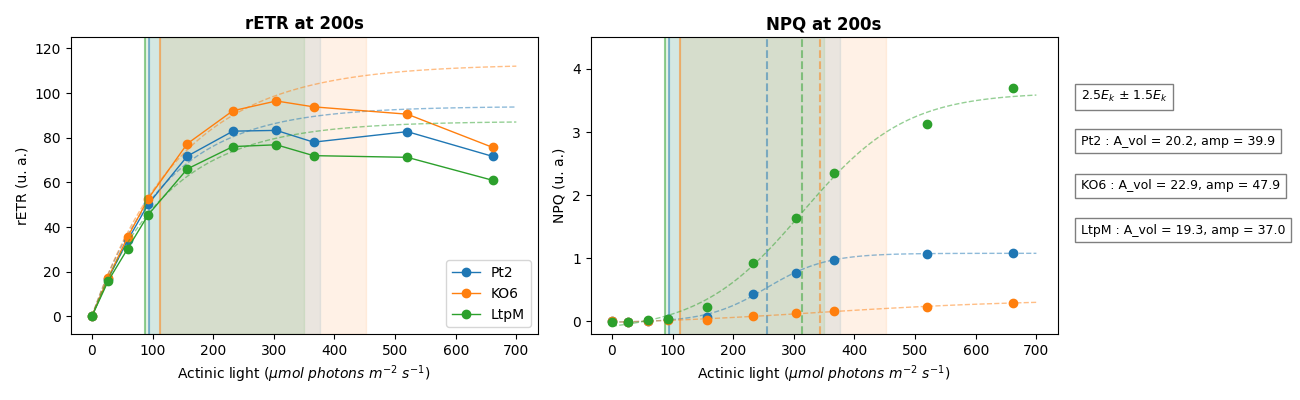

In [15]:
fig, ax = plt.subplots(1,2, figsize = (13, 4))

time = 200

offset_Ek = 2.5
amp_EK = 1.5


Ek = []
E50NPQ = []
AL_min = []
AL_max = []
AL_amp = []


conditions_to_compare = ["Pt2", "KO6", "LtpM"]
ax[0].set_ylim(-8, 125)
ax[1].set_ylim(-0.2, 4.5)
for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax[0].plot(light, ETR, 'o-', label = condition, linewidth = 1, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.Ek_fit(light[0:7], ETR[0:7], 0, 700, 100, p0 = [100, 100])
    Ek.append(popt[0])
    ax[0].plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)    
    ylim = ax[0].get_ylim()
    # ax[0].annotate('', xy=(offset_Ek*Ek[-1] - amp_EK*Ek[-1], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[-1] + amp_EK*Ek[-1], ylim[1]- 0.05*ylim[1]*(i+1)),
    #         arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))
    ax[0].fill_betweenx([ylim[0], ylim[1]], offset_Ek*Ek[-1] - amp_EK*Ek[-1], offset_Ek*Ek[-1] + amp_EK*Ek[-1], alpha=0.1, color = f"C{i}")
    ax[0].axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5)
    
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    ax[1].plot(light, NPQ, 'o', label = condition, color = f"C{i}")
    popt, pcov, xfit, yfit = tools.sigmoid_fit(light, NPQ, 0, 700, 100, p0 =  [1, 0.02, 300, 0])
    E50NPQ.append(popt[2])
    ax[1].plot(xfit, yfit, '--', linewidth = 1, color = f"C{i}", alpha = 0.5)
    ax[1].axvline(x=popt[2], linestyle = '--', linewidth=1.5, color = f"C{i}", alpha = 0.5, label = "E50NPQ")
    ax[1].axvline(x=Ek[-1], linewidth=1.5, color = f"C{i}", alpha = 0.5, label = "Ek")
    ax[1].fill_betweenx([ylim[0], ylim[1]], offset_Ek*Ek[-1] - amp_EK*Ek[-1], offset_Ek*Ek[-1] + amp_EK*Ek[-1], alpha=0.1, color = f"C{i}")
    ylim = ax[1].get_ylim()
    # ax[1].annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
    #         arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))
    AL_min.append(tools.get_AL(offset_Ek*Ek[-1] - amp_EK*Ek[-1]))
    AL_max.append(tools.get_AL(offset_Ek*Ek[-1] + amp_EK*Ek[-1]))
    AL_amp.append(AL_max[-1] - AL_min[-1])
    
    ax[1].text(1.05, 0.8 - 0.15 *(1+i), f"{condition} : A_vol = {AL_min[-1]:.1f}, amp = {AL_amp[-1]:.1f}", fontsize=9, verticalalignment='center', transform=ax[1].transAxes, bbox=dict(facecolor='white', alpha=0.5))    
    
ax[1].text(1.05, 0.8, f"{offset_Ek}$E_k$ ± {amp_EK}$E_k$ ", fontsize=9, verticalalignment='center', transform=ax[1].transAxes, bbox=dict(facecolor='white', alpha=0.5))
ax[0].legend()
ax[0].set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax[0].set_ylabel("rETR (u. a.)")
ax[0].set_ylim(-8, 125)
ax[0].set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')

ax[1].set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax[1].set_ylabel("NPQ (u. a.)")
ax[1].set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')


fig.tight_layout()





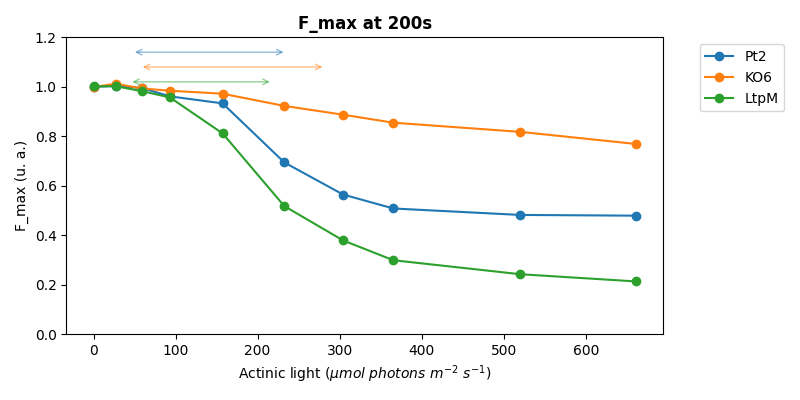

In [11]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

ax.set_ylim(0, 1.2)

for condition in conditions:
    i = conditions.index(condition)
    F_max_matrix = np.asarray(results[i].F_max.tolist())
    F_max = F_max_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_max, 'o-', label = condition, color = f"C{i}")
    ylim = ax.get_ylim()
    ax.annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
            arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))  

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_max (u. a.)")
ax.set_title(f"F_max at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_max_{time}s_all.png", dpi=300)

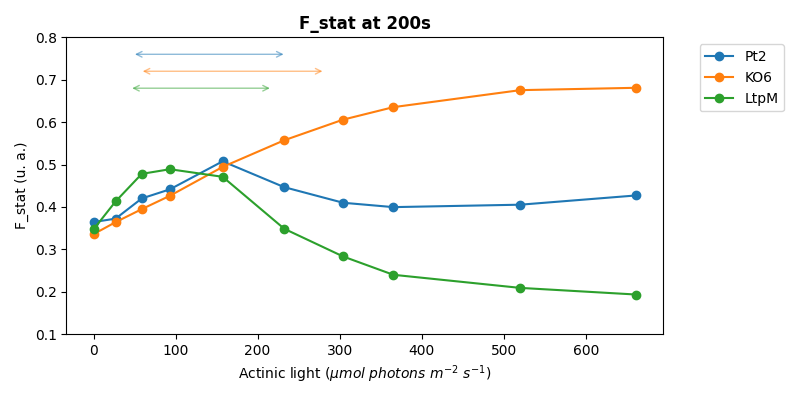

In [12]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))
ax.set_ylim(0.1, 0.8)
for condition in conditions:
    i = conditions.index(condition)
    F_stat_matrix = np.asarray(results[i].F_stat.tolist())
    F_stat = F_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_stat, 'o-', label = condition, color = f"C{i}")
    ylim = ax.get_ylim()
    ax.annotate('', xy=(offset_Ek*Ek[i] - amp_EK*Ek[i], ylim[1] - 0.05*ylim[1]*(i+1)), xytext=(offset_Ek*Ek[i] + amp_EK*Ek[i], ylim[1]- 0.05*ylim[1]*(i+1)),
            arrowprops=dict(arrowstyle='<->', color=f"C{i}", alpha = 0.5))  

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_stat (u. a.)")
ax.set_title(f"F_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_stat_{time}s_all.png", dpi=300)

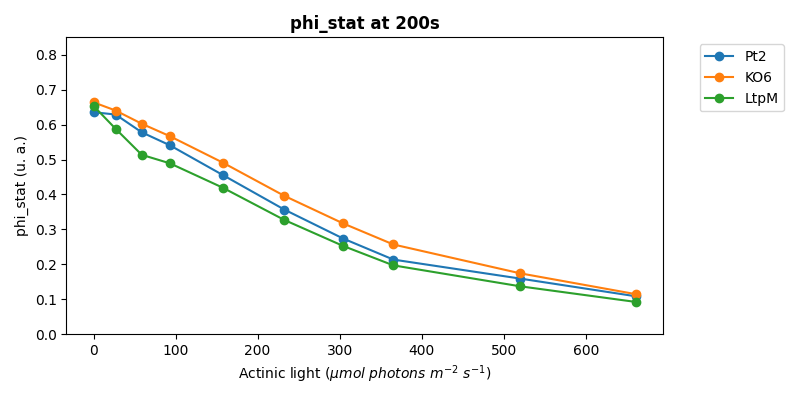

In [13]:
time = 200
fig, ax = plt.subplots(figsize = (8, 4))

for condition in conditions:
    i = conditions.index(condition)
    phi_stat_matrix = np.asarray(results[i].phi_stat.tolist())
    phi_stat = phi_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, phi_stat, 'o-', label = condition, color = f"C{i}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("phi_stat (u. a.)")
ax.set_ylim(0, 0.85)
ax.set_title(f"phi_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/phi_stat_{time}s_all.png", dpi=300)

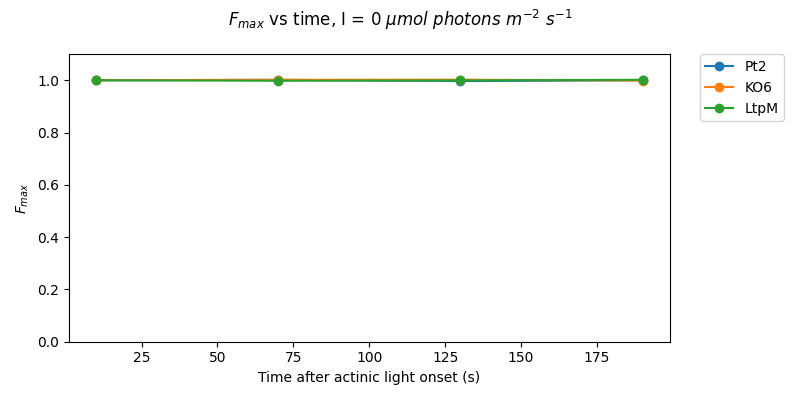

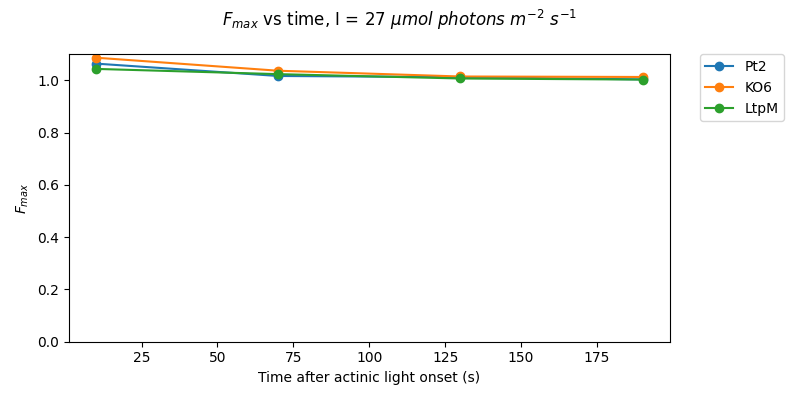

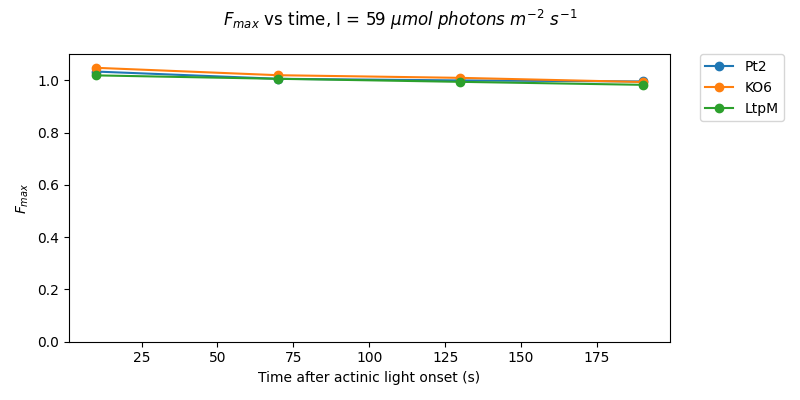

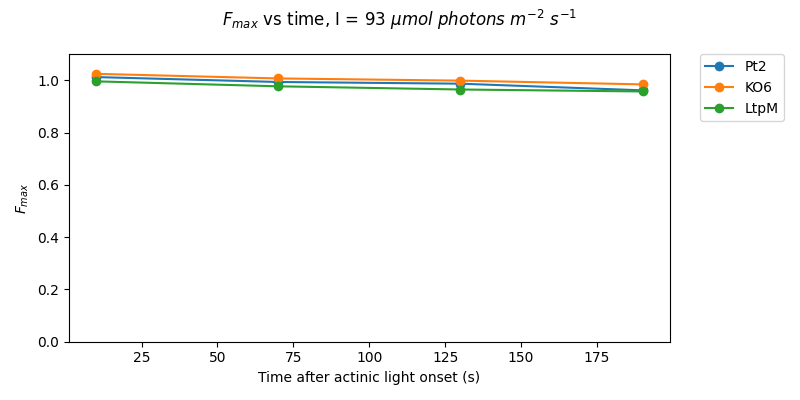

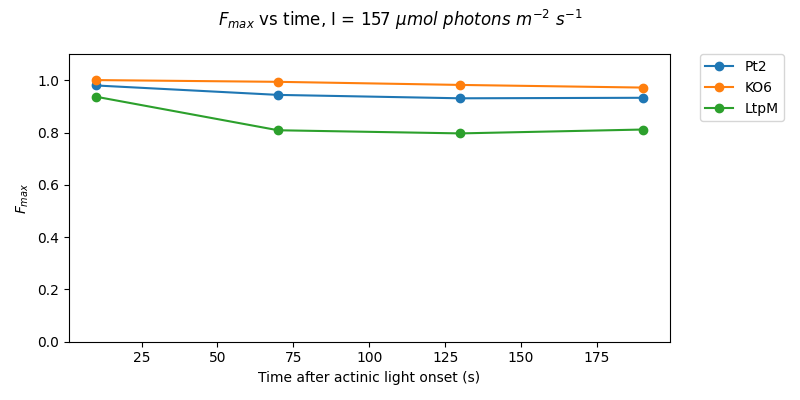

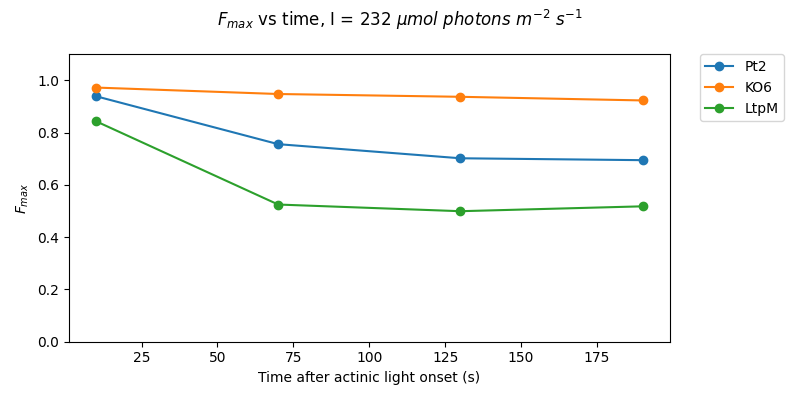

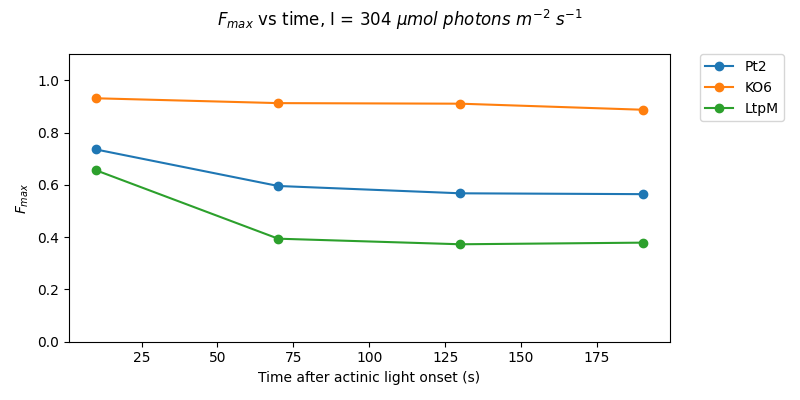

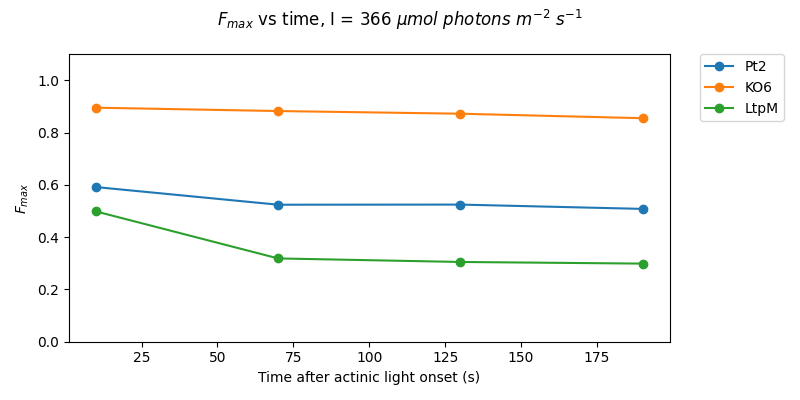

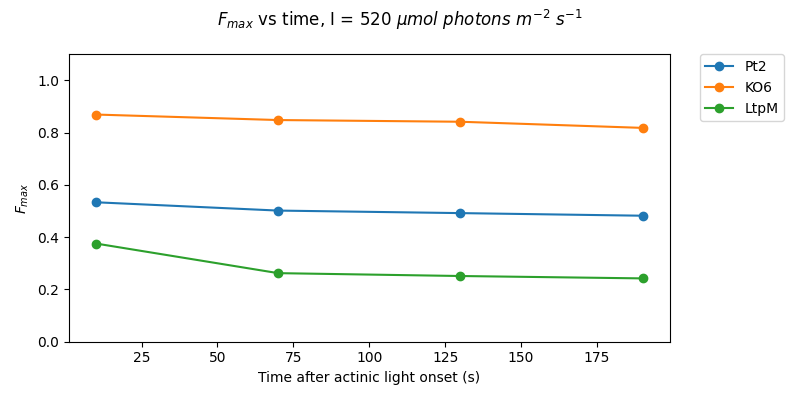

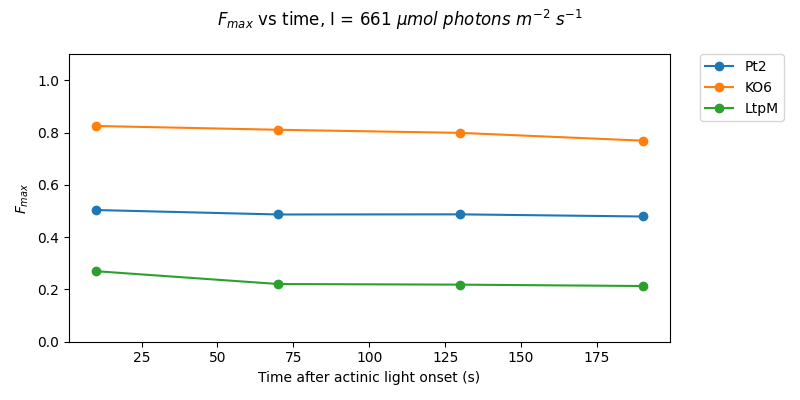

In [14]:
light_index = 0

for light_index in range(len(results[0].Actinic)):
    # conditions_to_compare = ["Control", "Control + Bicarbonate", "qE active"]
    conditions_to_compare = conditions

    fig, ax = plt.subplots(figsize = (8,4))

    light = results[0].Actinic.tolist()[light_index]
    fig.suptitle(f"$F_{{max}}$ vs time, I = {light:.0f} $µmol$ $photons$ $m^{{-2}}$ $s^{{-1}}$", fontsize = 12)

    for condition in conditions_to_compare:
        i = conditions.index(condition)
        F_max_matrix = np.asarray(results[i].F_max.tolist())
        F_max = F_max_matrix[light_index,:]
        ax.plot(np.array(times_Fmax) - 10, F_max, 'o-', label = condition, color = f"C{i}")

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time after actinic light onset (s)")
    ax.set_ylabel("$F_{max}$")
    ax.set_ylim(0, 1.1)
    fig.tight_layout()

    fig.savefig(f"{fig_folder}/F_max_time_{light:.0f}.png", dpi=300)
